### 取り上げる内容

<ul>
    <li>教師なしデータ圧縮での主成分分析(PCA)</li>
    <li>クラスの分離を最大化する教師あり次元削減法としてのLDA</li>
    <li>カーネル主成分分析(KPCA)によるひ非線形次元削減</li>
</ul>

### 主成分分析による教師なし次元削減

次元の呪いを減らすことで、予測性能を向上させることができる。<br>

### 主成分分析の主要なステップ

最もよく用いられているのが、特徴抽出と次元削減。<br>
PCAは、特徴量同士の相関関係に基づいてデータからパターンを抽出するのに役立つ。<br>
簡単に言うと、PCAの目的は高次元データにおいて分散が最大となる方向を見つけ出し、<br>
元の次元と同じかそれよりも低い次元に落とし込む。<br>

新しい特徴軸が互いに直行すると言う制約が存在するとすれば、<br>
新しい部分空間の直行軸を分散が最大となる方向と見做すことができる。<br>
https://www.yukisako.xyz/entry/correlation-coefficient<br>
PC1とPC2を主成分とする。<br>

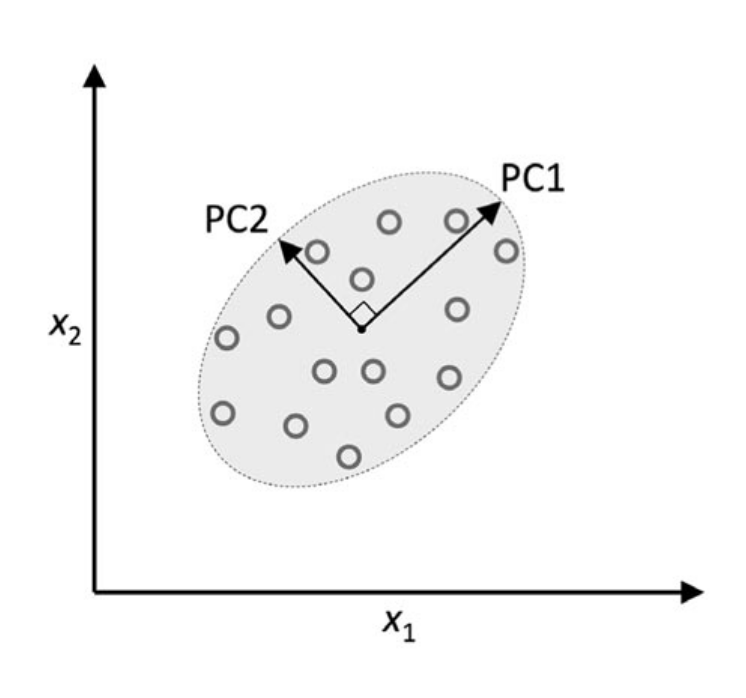

In [1]:
# 画像の表示
from IPython.display import Image
Image(filename='IMG/00.png', width=400)

### 次元削減のためのPCAアルゴリズムのアプローチ

<ol>
    <li>$d$次元のデータセットを標準化</li>
    <li>標準化したデータセットの共分散行列を作成する。</li>
    <li>共分散行列を固有ベクトルと固有値に分解する。</li>
    <li>固有値を降順でソートすることで、対応する固有ベクトルをランクづける。</li>
    <li>最も大きい$k$個の固有値に対応する$k$個の固有ベクトルを選択する。</li>
    <li>上位$k$個の固有ベクトルから射影行列$W$を作成する。</li>
    <li>射影行列$W$を使って$d$次元の入力データセット$X$を変換し、<br>
   　 新しい$k$次元の特徴部分空間を取得する。</li>
</ol>

ここでは、機械学習の実習として、Pythonを使ったPCAの実行を順番に見ていく。<br>

### 主成分を抽出する

ここでは、最初の４つに絞って行う。<br>
まず、前章で用いたWineデータを読み込む。<br>

In [11]:
import pandas as pd
df_wine = pd.read_csv('wine.csv', header=None)

In [17]:
df_wine = df_wine.drop(0, axis=0)

In [18]:
df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
                   'Alcalinity of ash', 'Magnesium', 'Total phenols',
                   'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                   'Color intensity', 'Hue',
                   'OD280/OD315 of diluted wines', 'Proline']

df_wine.head()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
1,1,14.23,1.71,2.43,15.6,127,2.8,3.06,.28,2.29,5.64,1.04,3.92,1065
2,1,13.2,1.78,2.14,11.2,100,2.65,2.76,.26,1.28,4.38,1.05,3.4,1050
3,1,13.16,2.36,2.67,18.6,101,2.8,3.24,.3,2.81,5.68,1.03,3.17,1185
4,1,14.37,1.95,2.5,16.8,113,3.85,3.49,.24,2.18,7.8,.86,3.45,1480
5,1,13.24,2.59,2.87,21,118,2.8,2.69,.39,1.82,4.32,1.04,2.93,735


### データセットを標準化

In [19]:
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values
#　トレーニングデータとテストデータに分割
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.3, 
                     stratify=y,
                     random_state=0)
# 平均と標準偏差を用いて標準化
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

/Users/Takanori/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


### 共分散行列を作成する

In [20]:
import numpy as np
# 共分散行列を作成する
cov_mat = np.cov(X_train_std.T)
# 固有値と固有ベクトルを計算
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)
print('\nEigenvalues \n%s' % eigen_vals)


Eigenvalues 
[4.84274532 2.41602459 1.54845825 0.96120438 0.84166161 0.6620634
 0.51828472 0.34650377 0.3131368  0.10754642 0.21357215 0.15362835
 0.1808613 ]


### 全分散と説明分散

固有値の分散説明率をプロットする。<br>
固有値の分散説明率とは、固有値の合計に対する固有値$\lambda_{j}$の割合のことである。<br>

In [21]:
# 固有値を合計
tot = sum(eigen_vals)
# 分散説明率を計算
var_exp = [(i/tot) for i in sorted(eigen_vals, reverse=True)]
# 分散説明率の累積和を取得
cum_var_exp = np.cumsum(var_exp)
import matplotlib.pyplot as plt
# 分散説明率の棒グラフを作成
plt.bar(range(1,14), var_exp, alpha=0.5, align='center', label='individual explained variance')
# 分散説明率の累積和の階段グラフを作成
plt.step(range(1, 14), cum_var_exp, where='mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

<Figure size 640x480 with 1 Axes>

### 特徴変換

共分散行列を固有対に分解できたところで、最後に進む。<br>

<ul>
    <li>最も大きい$k$個の固有値に対応する$k$個の固有ベクトルを選択する。<br>
    この場合の$k$は新しい特徴部分空間の次元数を示す。</li>
    <li>上位$k$個の固有ベクトルから射影行列$W$を作成する。</li>
    <li>射影行列$W$を使って$d$次元の入力データセット$X$を変換し、新しい$k$次元の特徴部分空間を取得する。</li>
</ul>

簡単に説明すると、<br>
固有値の大きいものから順に固有対を並び替え、<br>
選択された固有ベクトルから射影行列を生成する。<br>
そして、この射影行列を使って、データをより低い次元の部分空間に変換する。<br>

In [22]:
# （固有値、固有ベクトル）のタプルのリストを作成
eigen_pairs  = [(np.abs(eigen_vals[i]), eigen_vecs[: , i]) for i in range(len(eigen_vals))]

In [23]:
# (固有値、固有ベクトル)のタプルを大きいものから順に並び替え
eigen_pairs.sort(key=lambda k : k[0], reverse=True)

In [24]:
w = np.hstack((eigen_pairs[0][1][:, np.newaxis], eigen_pairs[1][1][:, np.newaxis]))

In [25]:
print('Matrix W: \n', w)

Matrix W: 
 [[-0.13724218  0.50303478]
 [ 0.24724326  0.16487119]
 [-0.02545159  0.24456476]
 [ 0.20694508 -0.11352904]
 [-0.15436582  0.28974518]
 [-0.39376952  0.05080104]
 [-0.41735106 -0.02287338]
 [ 0.30572896  0.09048885]
 [-0.30668347  0.00835233]
 [ 0.07554066  0.54977581]
 [-0.32613263 -0.20716433]
 [-0.36861022 -0.24902536]
 [-0.29669651  0.38022942]]


In [26]:
X_train_std[0].shape

(13,)

In [27]:
print(w.shape)

(13, 2)


In [28]:
X_train_std[0].dot(w)

array([2.38299011, 0.45458499])

In [29]:
X_train_pca = X_train_std.dot(w)

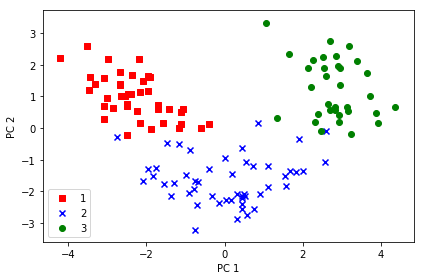

In [30]:
X_train_pca = X_train_std.dot(w)
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']

for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_pca[y_train == l, 0], 
                X_train_pca[y_train == l, 1], 
                c=c, label=l, marker=m)

plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
# plt.savefig('images/05_03.png', dpi=300)
plt.show()

### scikit-learnの主成分分析

In [31]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.6, 
                    c=cmap(idx),
                    edgecolor='black',
                    marker=markers[idx], 
                    label=cl)

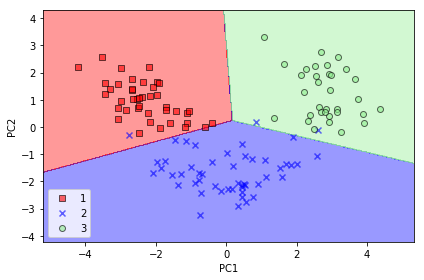

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
# 主成分数を指定して、PCAのインスタンスを生成
pca = PCA(n_components=2)
lr = LogisticRegression()
# トレーニングデータとテストデータでPCAを実行
x_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)
# トレーニングデータでロジスティック回帰を実行
lr.fit(X_train_pca, y_train)
# 決定領域をプロット
plot_decision_regions(X_train_pca, y_train, classifier=lr)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(loc = 'lower left')
plt.tight_layout()
plt.show()

### 線形判別分析による教師ありデータ圧縮

LDAはクラスの分離を最適化する特徴空間を見つけ出そうとする。<br>

### LDAの内分の仕組み

<ol>
    <li>$d$次元のデータセットを標準化する。</li>
    <li>クラスごとに$d$次元の平均ベクトル（各次元の平均値で構成されるベクトル）を計算する。</li>
    <li>平均ベクトルを使って、クラス間変動行列$S_{B}$とクラス内変動行列$S_{W}$を生成する。</li>
    <li>行列$S^{-1}_{W}S_{B}$の固有ベクトルと対応する固有値を計算する。</li>
    <li>固有値を降順でソートすることによって、対応する固有ベクトルをランク付けする。</li>
    <li>次元を削減するための固有ベクトルを選択。固有ベクトルから変換行列$W$を生成。</li>
    <li>変換行列$W$を使って、サンプルを新しい特徴部分空間へ射影する。</li>
</ol>

### 変動行列を計算する

平均ベクトル$m_{i}$には、クラス$i$のサンプルに関する平均特徴量の値$\mu_{m}$が格納される。<br>

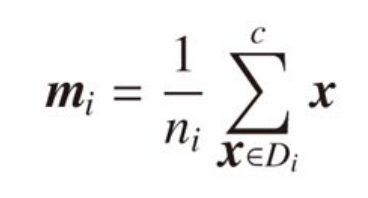

In [36]:
# 画像の表示
from IPython.display import Image
Image(filename='IMG/01.png', width=250)

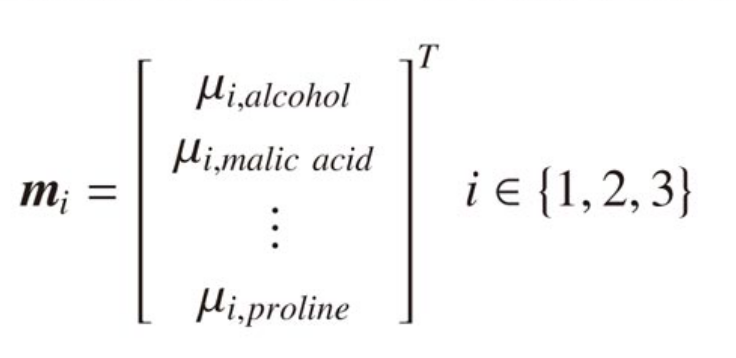

In [38]:
# 画像の表示
from IPython.display import Image
Image(filename='IMG/02.png', width=450)

In [44]:
np.set_printoptions(precision=4)
mean_vecs = []

In [45]:
for label in range(1, 4):
    mean_vecs.append(np.mean(X_train_std[y_train == label], axis=0))
    print('MV %s: %s\n' % (label, mean_vecs[label - 1]))

MV 1: [nan nan nan nan nan nan nan nan nan nan nan nan nan]

MV 2: [nan nan nan nan nan nan nan nan nan nan nan nan nan]

MV 3: [nan nan nan nan nan nan nan nan nan nan nan nan nan]



/Users/Takanori/anaconda/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/Takanori/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:73: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


### scikit_learnによる線形判別分析

In [46]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
# 次元数を指定して、LDAのインスタンスを生成
lda = LDA(n_components=2)
X_train_lda = lda.fit_transform(X_train_std, y_train)

ロジスティック回帰の分類器が、LDAによって変換された低次元のトレーニングデータセットをどのように処理するか?

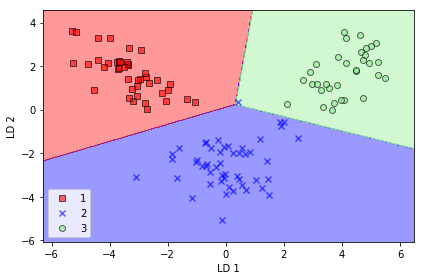

In [48]:
lr = LogisticRegression()
lr = lr.fit(X_train_lda, y_train)
plot_decision_regions(X_train_lda, y_train, classifier=lr)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()